In [410]:
import numpy as np
import pandas as pd

In [411]:
##Importação dos dados de treino

In [412]:
fd001_train = pd.read_csv("train_FD001.txt",
                    sep='\s+',
                    header= None)  

fd001_test = pd.read_csv("test_FD001.txt",
                    sep='\s+',
                    header= None) 

rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None) 

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:2: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+',
C:\Users\davim\AppData\Local\Temp\ipykernel_22520\2366027756.py:9: SyntaxWarning: invalid escape sequence '\s'
  rul001 = pd.read_csv("RUL_FD001.txt",sep='\s+',header= None)


In [413]:
##Remoção de colunas inteiramente preenchidas por NaN

In [414]:
fd001_train = fd001_train.dropna(axis=1,how='all')
fd001_test = fd001_test.dropna(axis=1,how='all')

In [415]:
##Introdução do cabeçalho do data frame

In [416]:
cabecalho1 = ["ID","Nº Ciclos","Altitude [ft]", "Mach","TRA", "T2 [°R]", "T24 [°R]", "T30 [°R]", 
             "T50[°R]", "P2 [psia]", "P15 [psia]", "P30 [psia]", "Nf [rpm]", "Nc [rpm]", "epr [-]",
             "Ps30 [psia]", "phi [pps/psi]", "NRf [rpm]", "NRc [rpm]", "BPR [-]", "farB [-]",
             "htBleed [-]", "Nf_dmd [rpm]", "PCNfR_dmd [rpm]", "W31 [lbm/s]", "W32 [lbm/s]"] 
fd001_train.columns = cabecalho1 
fd001_test.columns = cabecalho1  
cabecalho2 = ["rul"]
rul001.columns = cabecalho2

print(fd001_train.head())

   ID  Nº Ciclos  Altitude [ft]    Mach    TRA  T2 [°R]  T24 [°R]  T30 [°R]  \
0   1          1        -0.0007 -0.0004  100.0   518.67    641.82   1589.70   
1   1          2         0.0019 -0.0003  100.0   518.67    642.15   1591.82   
2   1          3        -0.0043  0.0003  100.0   518.67    642.35   1587.99   
3   1          4         0.0007  0.0000  100.0   518.67    642.35   1582.79   
4   1          5        -0.0019 -0.0002  100.0   518.67    642.37   1582.85   

   T50[°R]  P2 [psia]  ...  phi [pps/psi]  NRf [rpm]  NRc [rpm]  BPR [-]  \
0  1400.60      14.62  ...         521.66    2388.02    8138.62   8.4195   
1  1403.14      14.62  ...         522.28    2388.07    8131.49   8.4318   
2  1404.20      14.62  ...         522.42    2388.03    8133.23   8.4178   
3  1401.87      14.62  ...         522.86    2388.08    8133.83   8.3682   
4  1406.22      14.62  ...         522.19    2388.04    8133.80   8.4294   

   farB [-]  htBleed [-]  Nf_dmd [rpm]  PCNfR_dmd [rpm]  W31 [lbm/s]

In [417]:
##Geração de Histogramas e seleção de variáveis

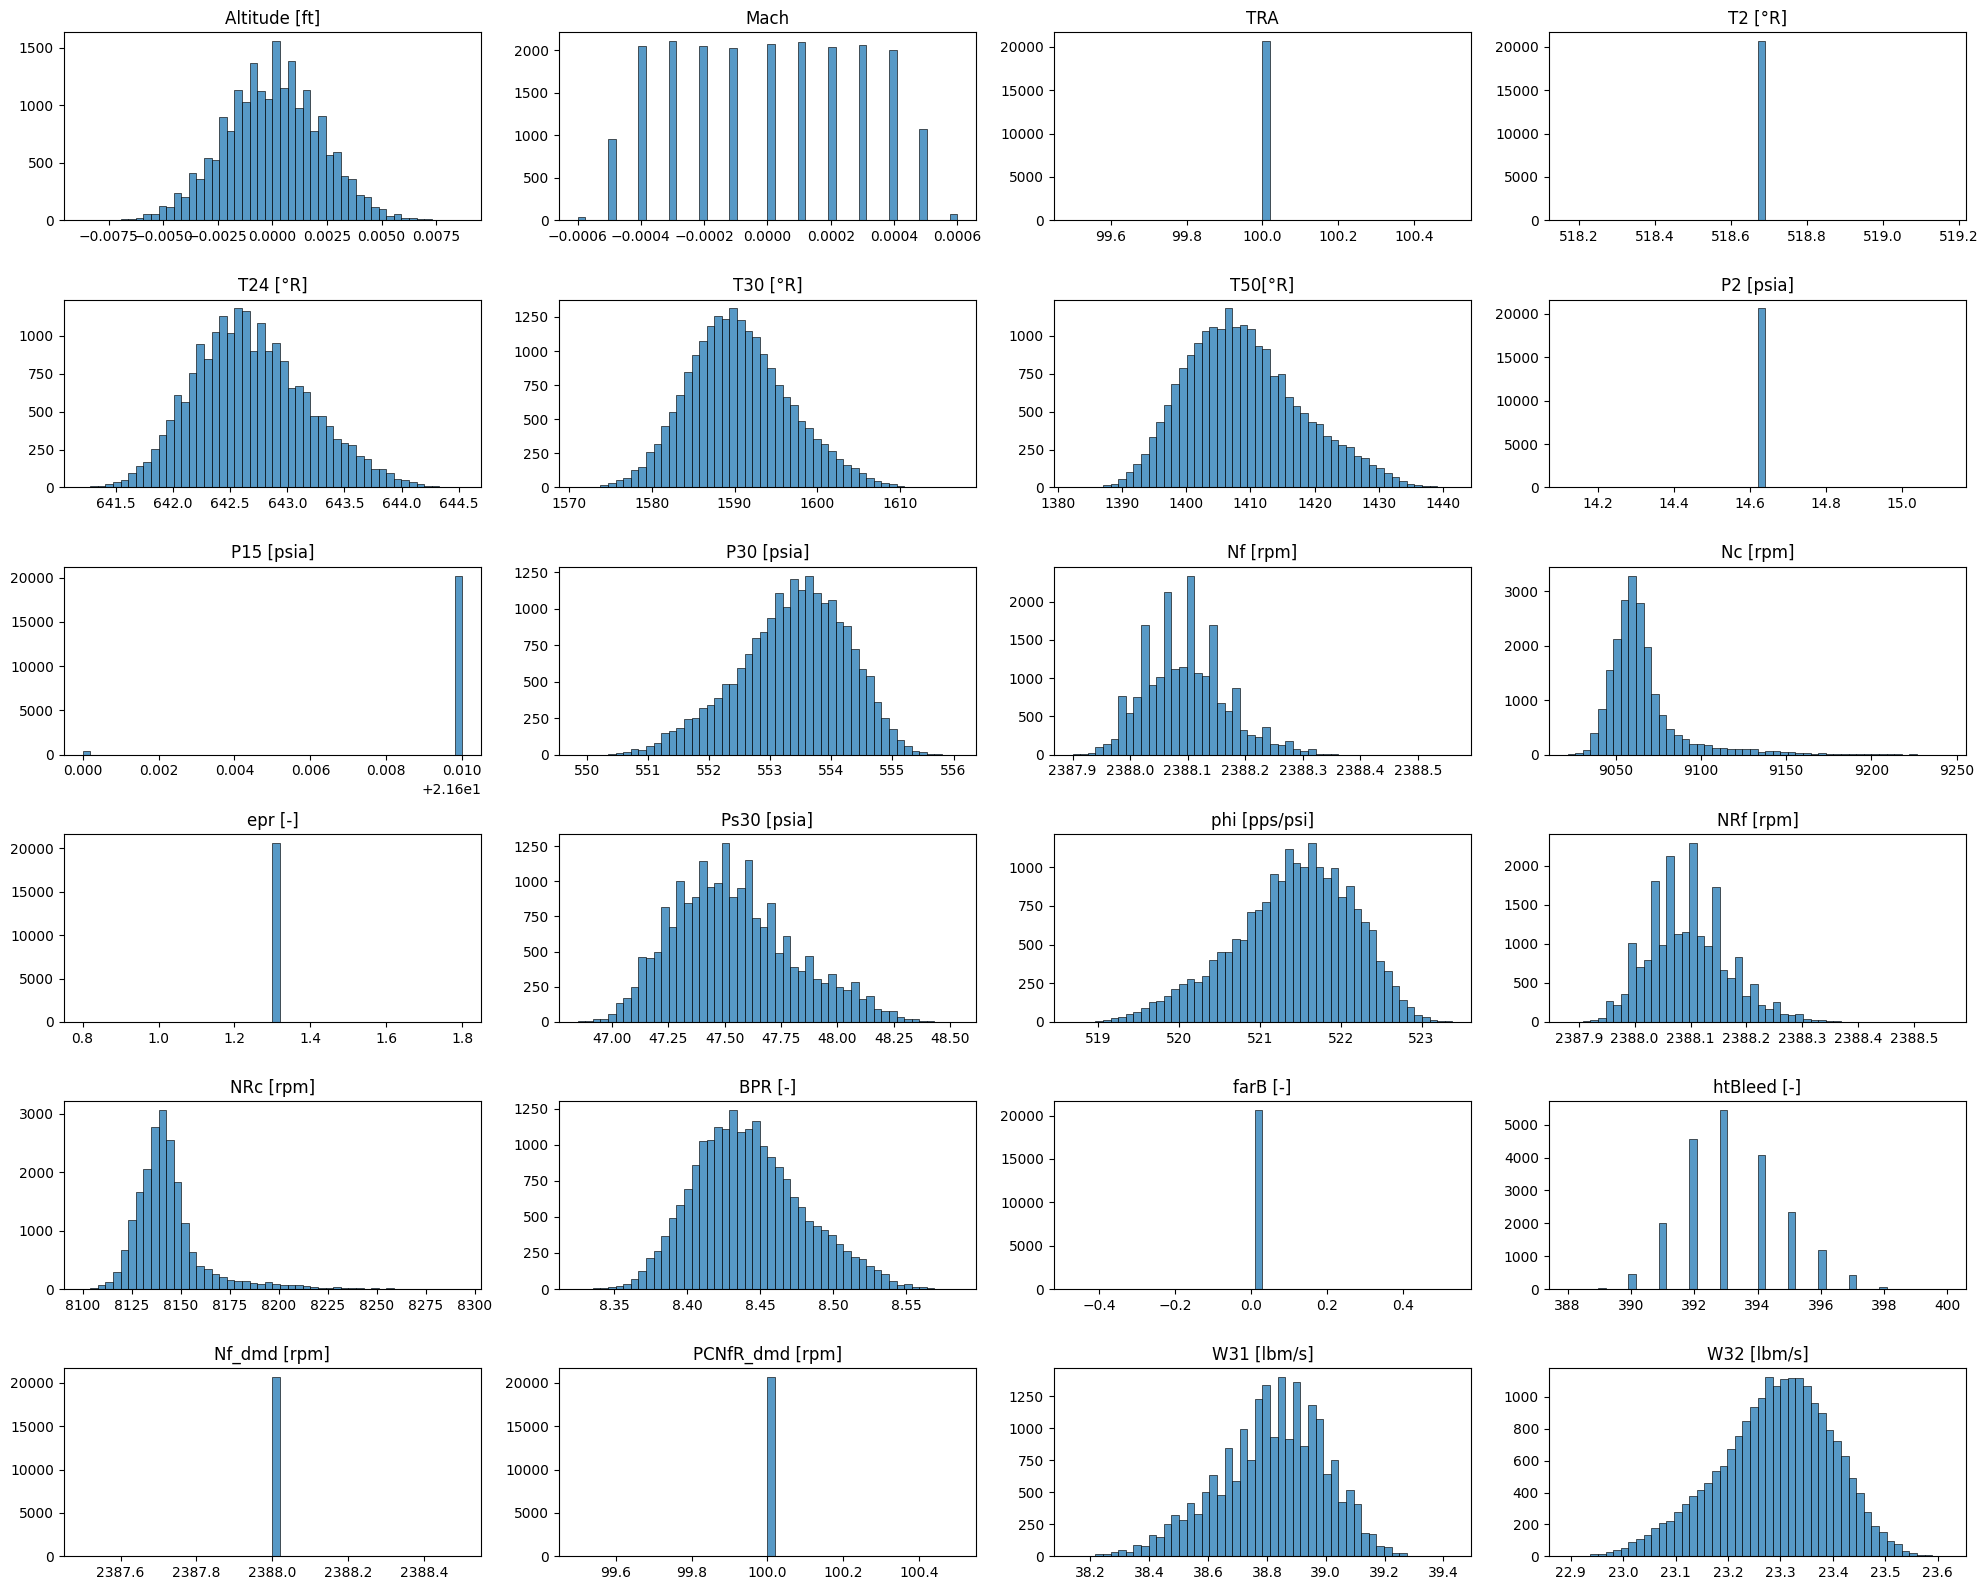

In [418]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,axes=plt.subplots(nrows=6,ncols=4,figsize=(20,16))
axes=axes.ravel()
for i,item in enumerate(fd001_train.columns[2:]):
    sns.histplot(fd001_train[item],bins=50,ax=axes[i])
    axes[i].set_title(f'{item}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('') 

plt.tight_layout()
plt.show()

In [419]:
features_train =fd001_train.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]', 'PCNfR_dmd [rpm]'])

features_test =fd001_test.drop(columns=['TRA','T2 [°R]','P2 [psia]', 'P15 [psia]','epr [-]',
                                    'farB [-]','PCNfR_dmd [rpm]']) 

In [420]:
##Normalização

In [421]:
from sklearn.preprocessing import MinMaxScaler

In [422]:
features=features_train.columns[2:]
scaler = MinMaxScaler()
features_train[features] = scaler.fit_transform(features_train[features])
features_test[features]=scaler.transform(features_test[features]) 

In [423]:
##Definição dos targets para regressão e classificação nos dados de treino

In [424]:
limit = 130 
max_ciclos = fd001_train.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_train = []
for m in fd001_train['ID'].unique():
    motor = fd001_train[fd001_train['ID']==m]
    aux=[]
    for k in range(len(motor['Nº Ciclos'])):
        if k+1 <= max_ciclos['Nº Ciclos'].iloc[m-1]-limit:
            aux.append(limit)
        else:
            aux.append(max_ciclos['Nº Ciclos'].iloc[m-1]-
                       motor['Nº Ciclos'].iloc[k]) 
    rul_train.extend(aux) 
rul_train = [int(x) for x in rul_train]

In [425]:
##Visualização de um ciclo de vida de um motor

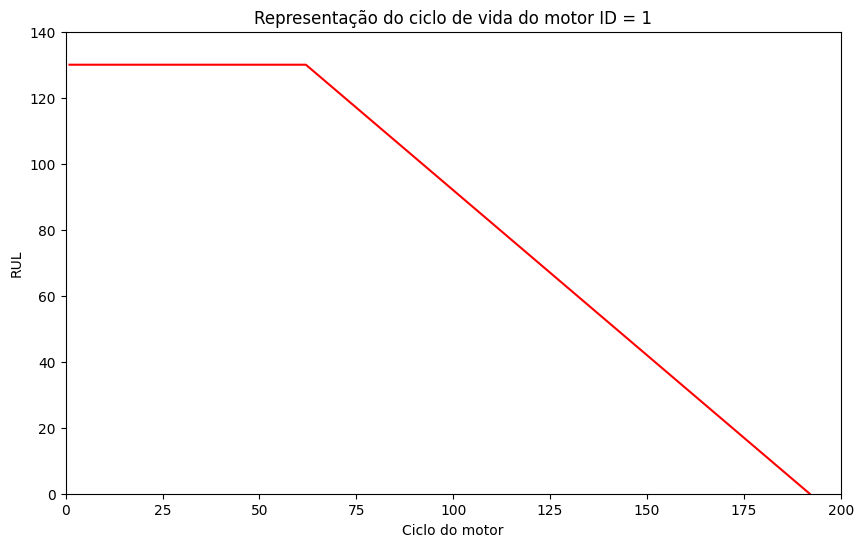

In [426]:
exemplo = fd001_train[fd001_train['ID']==1]
l=len(exemplo['Nº Ciclos'])

plt.figure(figsize=(10,6))

plt.plot(exemplo['Nº Ciclos'].iloc[0:l],rul_train[0:l],c='red')
plt.title('Representação do ciclo de vida do motor ID = 1')
plt.ylim(0,140)
plt.xlim(0,200)
plt.xlabel('Ciclo do motor')
plt.ylabel('RUL')
plt.show()

In [427]:
##Definição dos targets para regressão e classificação nos dados de teste 

In [428]:
max_ciclos_test = fd001_test.groupby('ID')['Nº Ciclos'].max().reset_index()
rul_test = []
for m in fd001_test['ID'].unique():
    engine = fd001_test[fd001_test['ID']==m]
    for k in range(len(engine['Nº Ciclos'])):
        rul_aux=(max_ciclos_test['Nº Ciclos'].iloc[m-1]-
                 engine['Nº Ciclos'].iloc[k])
        v = rul_aux+rul001['rul'].iloc[m-1]
        if v >= limit:
            rul_test.append(limit)
        else:
            rul_test.append(v)
rul_test = [int(x) for x in rul_test]

In [429]:
##Criação das janelas de tempo para dados de treino e de teste

In [430]:
def time_window(data,rul,window_size,step):
    x,y = [], []
    l=0
    for m in data['ID'].unique():
        engine = data[data['ID']==m]
        for i in range(0,len(engine)-window_size+1,step):
            f= i + window_size
            x.append(engine.iloc[i:f,2:].values)
            y.append(rul[l+f-1]) 
        l += len(engine)
    return np.array(x), np.array(y)
window_size = 30
step = 1
x_train, y_train= time_window(features_train,rul_train,window_size,step)

print(x_train.shape,y_train.shape)  

x_test, y_test= time_window(features_test,rul_test,window_size,step)
print(x_test.shape,y_test.shape)

(17731, 30, 17) (17731,)
(10196, 30, 17) (10196,)


In [431]:
##Separação das variáveis de treino e teste

In [432]:
from sklearn.model_selection import train_test_split

x1,x2,y1,y2 = train_test_split(x_train,y_train,test_size=0.2,random_state=1)

x1=x1.astype('float32')
x2=x2.astype('float32')
y1=y1.astype('float32')
y2=y2.astype('float32')

In [433]:
##Criação do modelo LSTM

In [434]:
from tensorflow import keras 
from keras import layers
from keras.models import Sequential
from keras.metrics import AUC
from keras.layers import LSTM,Dense,Dropout,Bidirectional
from keras.optimizers import RMSprop, Adam
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf 
import keras_tuner
import time  

shape = (x1.shape[1], x1.shape[2])

model_lstm=Sequential()
model_lstm.add(LSTM(64,activation='tanh',
                return_sequences=True,input_shape=shape))
model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(256,activation='tanh'))
model_lstm.add(Dropout(0.4))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(64,activation='relu'))
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='linear'))

model_lstm.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [435]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - loss: 3643.7815 - mean_absolute_error: 49.8158 - mean_squared_error: 3643.7815

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 153ms/step - loss: 2231.5693 - mean_absolute_error: 39.0452 - mean_squared_error: 2231.5693 - val_loss: 705.3470 - val_mean_absolute_error: 22.6420 - val_mean_squared_error: 705.3470
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - loss: 984.3921 - mean_absolute_error: 25.3722 - mean_squared_error: 984.3922

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 166ms/step - loss: 899.6832 - mean_absolute_error: 24.0242 - mean_squared_error: 899.6832 - val_loss: 974.3364 - val_mean_absolute_error: 24.0991 - val_mean_squared_error: 974.3364
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 735.6174 - mean_absolute_error: 21.3096 - mean_squared_error: 735.6174

71/71 ━━━━━━━━━━━━━━━━━━━━ 12s 169ms/step - loss: 686.5594 - mean_absolute_error: 20.5340 - mean_squared_error: 686.5594 - val_loss: 362.4585 - val_mean_absolute_error: 14.9203 - val_mean_squared_error: 362.4585
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step - loss: 580.3647 - mean_absolute_error: 18.5987 - mean_squared_error: 580.3647

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 225ms/step - loss: 555.7625 - mean_absolute_error: 18.1981 - mean_squared_error: 555.7625 - val_loss: 424.9800 - val_mean_absolute_error: 16.4761 - val_mean_squared_error: 424.9800
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step - loss: 452.0714 - mean_absolute_error: 16.5229 - mean_squared_error: 452.0714

71/71 ━━━━━━━━━━━━━━━━━━━━ 18s 250ms/step - loss: 456.2884 - mean_absolute_error: 16.5360 - mean_squared_error: 456.2884 - val_loss: 291.4279 - val_mean_absolute_error: 13.7113 - val_mean_squared_error: 291.4279
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step - loss: 431.7084 - mean_absolute_error: 15.9614 - mean_squared_error: 431.7084

71/71 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - loss: 430.9483 - mean_absolute_error: 15.9636 - mean_squared_error: 430.9483 - val_loss: 289.8266 - val_mean_absolute_error: 13.0559 - val_mean_squared_error: 289.8266
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - loss: 391.1991 - mean_absolute_error: 15.2790 - mean_squared_error: 391.1991

71/71 ━━━━━━━━━━━━━━━━━━━━ 16s 222ms/step - loss: 395.7561 - mean_absolute_error: 15.2764 - mean_squared_error: 395.7561 - val_loss: 273.0259 - val_mean_absolute_error: 13.0080 - val_mean_squared_error: 273.0259
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step - loss: 366.8368 - mean_absolute_error: 14.7457 - mean_squared_error: 366.8368

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 304ms/step - loss: 370.1391 - mean_absolute_error: 14.7082 - mean_squared_error: 370.1391 - val_loss: 274.8233 - val_mean_absolute_error: 12.4117 - val_mean_squared_error: 274.8233
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - loss: 365.6834 - mean_absolute_error: 14.5476 - mean_squared_error: 365.6834

71/71 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - loss: 358.7452 - mean_absolute_error: 14.4057 - mean_squared_error: 358.7452 - val_loss: 264.1653 - val_mean_absolute_error: 11.8498 - val_mean_squared_error: 264.1653
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - loss: 351.6092 - mean_absolute_error: 14.1912 - mean_squared_error: 351.6092

71/71 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - loss: 350.5149 - mean_absolute_error: 14.2098 - mean_squared_error: 350.5149 - val_loss: 254.1861 - val_mean_absolute_error: 11.3366 - val_mean_squared_error: 254.1861
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - loss: 353.6393 - mean_absolute_error: 14.2609 - mean_squared_error: 353.6393

71/71 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - loss: 341.6409 - mean_absolute_error: 13.9908 - mean_squared_error: 341.6409 - val_loss: 246.0466 - val_mean_absolute_error: 12.1661 - val_mean_squared_error: 246.0466
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 335.4178 - mean_absolute_error: 13.8373 - mean_squared_error: 335.4178

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 149ms/step - loss: 338.6553 - mean_absolute_error: 13.9505 - mean_squared_error: 338.6553 - val_loss: 259.3842 - val_mean_absolute_error: 11.6854 - val_mean_squared_error: 259.3842
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 309.8463 - mean_absolute_error: 13.3976 - mean_squared_error: 309.8463

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 314.0829 - mean_absolute_error: 13.4440 - mean_squared_error: 314.0829 - val_loss: 244.1440 - val_mean_absolute_error: 11.3290 - val_mean_squared_error: 244.1440
Epoch 14/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - loss: 337.6155 - mean_absolute_error: 13.8871 - mean_squared_error: 337.6155

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 152ms/step - loss: 321.7956 - mean_absolute_error: 13.5651 - mean_squared_error: 321.7957 - val_loss: 292.6731 - val_mean_absolute_error: 11.4961 - val_mean_squared_error: 292.6731
Epoch 15/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - loss: 309.6143 - mean_absolute_error: 13.2397 - mean_squared_error: 309.6143

71/71 ━━━━━━━━━━━━━━━━━━━━ 11s 158ms/step - loss: 312.2207 - mean_absolute_error: 13.2976 - mean_squared_error: 312.2207 - val_loss: 213.4312 - val_mean_absolute_error: 10.5414 - val_mean_squared_error: 213.4312
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 289.9354 - mean_absolute_error: 12.7864 - mean_squared_error: 289.9354

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 302.6630 - mean_absolute_error: 13.0734 - mean_squared_error: 302.6630 - val_loss: 250.4078 - val_mean_absolute_error: 10.9559 - val_mean_squared_error: 250.4078
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - loss: 296.3520 - mean_absolute_error: 12.8925 - mean_squared_error: 296.3520

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 293.4767 - mean_absolute_error: 12.8215 - mean_squared_error: 293.4767 - val_loss: 260.5175 - val_mean_absolute_error: 10.9394 - val_mean_squared_error: 260.5175
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 293.6392 - mean_absolute_error: 12.8953 - mean_squared_error: 293.6392

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 298.2154 - mean_absolute_error: 13.0151 - mean_squared_error: 298.2154 - val_loss: 307.6109 - val_mean_absolute_error: 13.9747 - val_mean_squared_error: 307.6109
Epoch 19/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 287.6381 - mean_absolute_error: 12.7500 - mean_squared_error: 287.6381

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 146ms/step - loss: 290.0182 - mean_absolute_error: 12.7826 - mean_squared_error: 290.0182 - val_loss: 198.2820 - val_mean_absolute_error: 10.5120 - val_mean_squared_error: 198.2820
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 274.2257 - mean_absolute_error: 12.4577 - mean_squared_error: 274.2257

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 147ms/step - loss: 277.3914 - mean_absolute_error: 12.4382 - mean_squared_error: 277.3914 - val_loss: 290.3303 - val_mean_absolute_error: 13.0270 - val_mean_squared_error: 290.3303
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - loss: 281.0088 - mean_absolute_error: 12.6870 - mean_squared_error: 281.0088

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - loss: 278.6010 - mean_absolute_error: 12.5298 - mean_squared_error: 278.6010 - val_loss: 418.1396 - val_mean_absolute_error: 15.9199 - val_mean_squared_error: 418.1396
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 294.9102 - mean_absolute_error: 12.8065 - mean_squared_error: 294.9102

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 140ms/step - loss: 283.4100 - mean_absolute_error: 12.6083 - mean_squared_error: 283.4100 - val_loss: 199.5068 - val_mean_absolute_error: 10.4074 - val_mean_squared_error: 199.5068
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - loss: 266.1987 - mean_absolute_error: 12.2772 - mean_squared_error: 266.1987

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 141ms/step - loss: 275.1208 - mean_absolute_error: 12.4419 - mean_squared_error: 275.1208 - val_loss: 238.7288 - val_mean_absolute_error: 11.8595 - val_mean_squared_error: 238.7288
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - loss: 273.3265 - mean_absolute_error: 12.3763 - mean_squared_error: 273.3265

71/71 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 274.5842 - mean_absolute_error: 12.3580 - mean_squared_error: 274.5842 - val_loss: 209.9358 - val_mean_absolute_error: 10.2619 - val_mean_squared_error: 209.9358


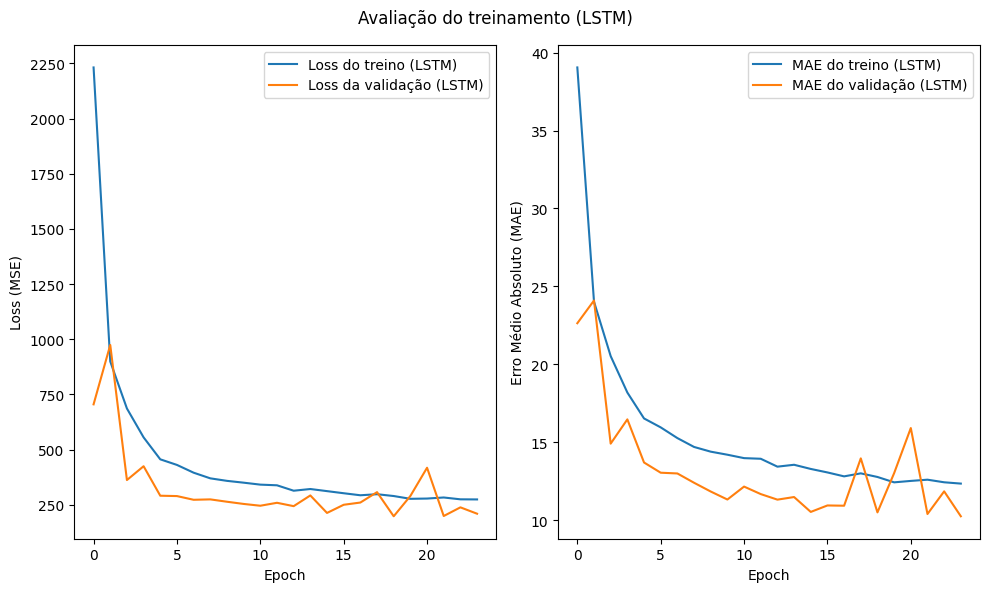

In [436]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('lstm_model.h5', monitor='val_loss')
history_lstm=model_lstm.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint]) 

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Loss do treino (LSTM)')
plt.plot(history_lstm.history['val_loss'], label='Loss da validação (LSTM)')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['mean_absolute_error'], label='MAE do treino (LSTM)')
plt.plot(history_lstm.history['val_mean_absolute_error'], label='MAE do validação (LSTM)')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (LSTM)')
plt.tight_layout()
plt.show()

In [437]:
##Testando o modelo com os dados de teste 

In [438]:
rul_prev = model_lstm.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step


In [439]:
##Avaliando o modelo

239.5260048220843
15.48
0.12777090362290094
11.218391103433973
0.7581365512248309
Tempo de 324.133993s


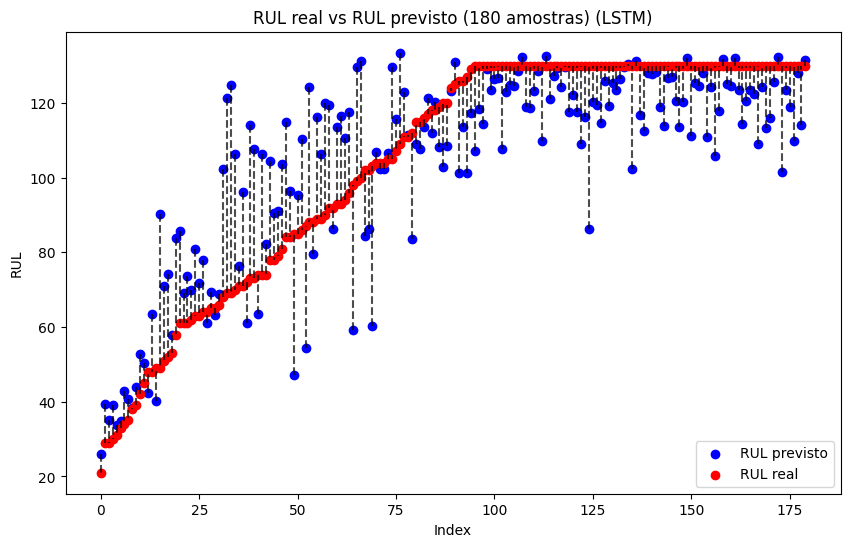

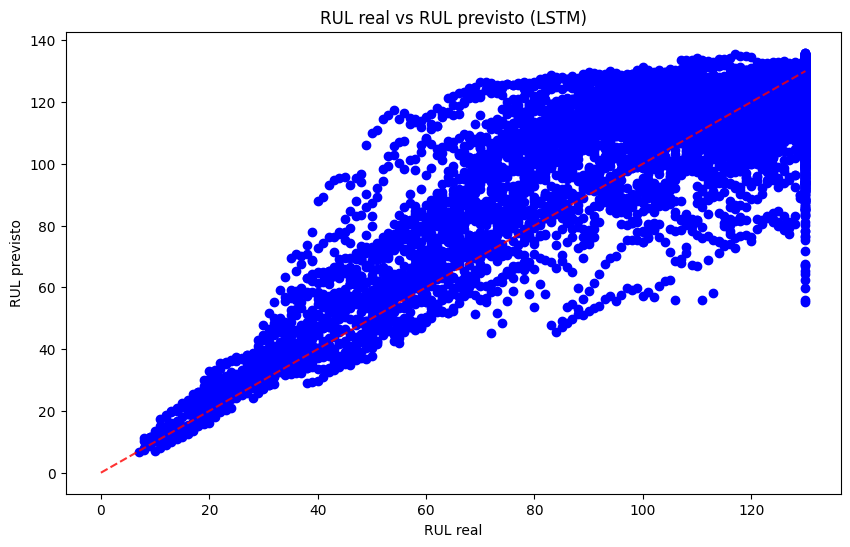

In [440]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (LSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (LSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()

In [441]:
##Criando modelo BiLSTM

In [442]:
model_bi=Sequential()
model_bi.add(Bidirectional(LSTM(64,activation='tanh',input_shape=shape)))
model_bi.add(Dropout(0.5))
model_bi.add(Dense(64,activation='relu'))
model_bi.add(Dense(1,activation='linear'))

model_bi.compile(optimizer=RMSprop(learning_rate=0.001), 
                loss='mse', 
            metrics=['mean_squared_error','mean_absolute_error'])

c:\Users\davim\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [443]:
##Treinando o modelo com os melhores hiperparâmetros

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 5466.8799 - mean_absolute_error: 62.6047 - mean_squared_error: 5466.8799

71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - loss: 3604.5425 - mean_absolute_error: 50.5582 - mean_squared_error: 3604.5425 - val_loss: 1880.3597 - val_mean_absolute_error: 38.5203 - val_mean_squared_error: 1880.3597
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 1395.0592 - mean_absolute_error: 32.0946 - mean_squared_error: 1395.0592

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 1078.0800 - mean_absolute_error: 27.6304 - mean_squared_error: 1078.0800 - val_loss: 569.1742 - val_mean_absolute_error: 20.1906 - val_mean_squared_error: 569.1742
Epoch 3/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 689.0053 - mean_absolute_error: 21.2717 - mean_squared_error: 689.0053

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 676.7808 - mean_absolute_error: 20.9773 - mean_squared_error: 676.7808 - val_loss: 478.0930 - val_mean_absolute_error: 17.5415 - val_mean_squared_error: 478.0930
Epoch 4/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 607.1360 - mean_absolute_error: 19.5610 - mean_squared_error: 607.1360

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 613.9647 - mean_absolute_error: 19.6385 - mean_squared_error: 613.9647 - val_loss: 437.0056 - val_mean_absolute_error: 16.9768 - val_mean_squared_error: 437.0056
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 599.2543 - mean_absolute_error: 19.2486 - mean_squared_error: 599.2544

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 594.5862 - mean_absolute_error: 19.1611 - mean_squared_error: 594.5862 - val_loss: 486.5130 - val_mean_absolute_error: 17.7481 - val_mean_squared_error: 486.5130
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 566.1349 - mean_absolute_error: 18.7450 - mean_squared_error: 566.1349

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 564.7690 - mean_absolute_error: 18.6794 - mean_squared_error: 564.7690 - val_loss: 409.6093 - val_mean_absolute_error: 16.1846 - val_mean_squared_error: 409.6093
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 561.3321 - mean_absolute_error: 18.5133 - mean_squared_error: 561.3321

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 553.8681 - mean_absolute_error: 18.3514 - mean_squared_error: 553.8681 - val_loss: 412.7193 - val_mean_absolute_error: 15.9522 - val_mean_squared_error: 412.7193
Epoch 8/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 546.6634 - mean_absolute_error: 18.1443 - mean_squared_error: 546.6634

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 543.3707 - mean_absolute_error: 18.1548 - mean_squared_error: 543.3707 - val_loss: 427.8018 - val_mean_absolute_error: 16.6150 - val_mean_squared_error: 427.8018
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 523.1610 - mean_absolute_error: 17.8366 - mean_squared_error: 523.1610

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 530.9807 - mean_absolute_error: 17.9699 - mean_squared_error: 530.9807 - val_loss: 393.4716 - val_mean_absolute_error: 15.8993 - val_mean_squared_error: 393.4716
Epoch 10/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 512.4870 - mean_absolute_error: 17.5532 - mean_squared_error: 512.4870

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 515.0557 - mean_absolute_error: 17.5767 - mean_squared_error: 515.0556 - val_loss: 356.7920 - val_mean_absolute_error: 15.1146 - val_mean_squared_error: 356.7920
Epoch 11/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 495.2635 - mean_absolute_error: 17.2943 - mean_squared_error: 495.2635

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 501.6050 - mean_absolute_error: 17.3910 - mean_squared_error: 501.6050 - val_loss: 357.9088 - val_mean_absolute_error: 15.3214 - val_mean_squared_error: 357.9088
Epoch 12/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 471.9908 - mean_absolute_error: 16.7150 - mean_squared_error: 471.9908

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 470.5232 - mean_absolute_error: 16.7758 - mean_squared_error: 470.5232 - val_loss: 337.6238 - val_mean_absolute_error: 14.2774 - val_mean_squared_error: 337.6238
Epoch 13/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 465.5760 - mean_absolute_error: 16.7458 - mean_squared_error: 465.5760

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 464.8037 - mean_absolute_error: 16.7227 - mean_squared_error: 464.8037 - val_loss: 324.1036 - val_mean_absolute_error: 13.8031 - val_mean_squared_error: 324.1037
Epoch 14/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 434.3836 - mean_absolute_error: 16.0900 - mean_squared_error: 434.3836

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 440.5159 - mean_absolute_error: 16.2169 - mean_squared_error: 440.5159 - val_loss: 295.9271 - val_mean_absolute_error: 13.0152 - val_mean_squared_error: 295.9271
Epoch 15/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 442.5050 - mean_absolute_error: 16.1572 - mean_squared_error: 442.5050

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 429.4815 - mean_absolute_error: 15.9633 - mean_squared_error: 429.4815 - val_loss: 292.4634 - val_mean_absolute_error: 12.3864 - val_mean_squared_error: 292.4635
Epoch 16/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 402.3114 - mean_absolute_error: 15.3420 - mean_squared_error: 402.3114

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 407.6469 - mean_absolute_error: 15.5166 - mean_squared_error: 407.6469 - val_loss: 274.5613 - val_mean_absolute_error: 12.5264 - val_mean_squared_error: 274.5613
Epoch 17/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 390.6128 - mean_absolute_error: 15.2185 - mean_squared_error: 390.6128

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 394.4595 - mean_absolute_error: 15.2488 - mean_squared_error: 394.4595 - val_loss: 253.3562 - val_mean_absolute_error: 12.6881 - val_mean_squared_error: 253.3562
Epoch 18/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 368.7671 - mean_absolute_error: 14.7560 - mean_squared_error: 368.7671

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 374.1042 - mean_absolute_error: 14.8525 - mean_squared_error: 374.1042 - val_loss: 243.4136 - val_mean_absolute_error: 11.6346 - val_mean_squared_error: 243.4136
Epoch 19/30
70/71 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 353.0501 - mean_absolute_error: 14.4009 - mean_squared_error: 353.0501

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 44ms/step - loss: 365.1668 - mean_absolute_error: 14.6613 - mean_squared_error: 365.1668 - val_loss: 346.1970 - val_mean_absolute_error: 12.9922 - val_mean_squared_error: 346.1970
Epoch 20/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 362.4485 - mean_absolute_error: 14.5316 - mean_squared_error: 362.4485

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 363.3457 - mean_absolute_error: 14.6520 - mean_squared_error: 363.3457 - val_loss: 233.2358 - val_mean_absolute_error: 11.5642 - val_mean_squared_error: 233.2358
Epoch 21/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 355.7669 - mean_absolute_error: 14.4455 - mean_squared_error: 355.7669

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 360.8455 - mean_absolute_error: 14.5828 - mean_squared_error: 360.8454 - val_loss: 253.8313 - val_mean_absolute_error: 12.5314 - val_mean_squared_error: 253.8313
Epoch 22/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 332.6939 - mean_absolute_error: 13.9980 - mean_squared_error: 332.6939

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 339.1106 - mean_absolute_error: 14.1605 - mean_squared_error: 339.1106 - val_loss: 397.4133 - val_mean_absolute_error: 15.0460 - val_mean_squared_error: 397.4133
Epoch 23/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 345.4153 - mean_absolute_error: 14.2264 - mean_squared_error: 345.4153

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 342.1184 - mean_absolute_error: 14.1674 - mean_squared_error: 342.1184 - val_loss: 250.8768 - val_mean_absolute_error: 12.0885 - val_mean_squared_error: 250.8768
Epoch 24/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 330.9739 - mean_absolute_error: 13.9290 - mean_squared_error: 330.9739

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 332.8961 - mean_absolute_error: 13.9578 - mean_squared_error: 332.8961 - val_loss: 310.5956 - val_mean_absolute_error: 13.4429 - val_mean_squared_error: 310.5956
Epoch 25/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 335.0886 - mean_absolute_error: 13.9598 - mean_squared_error: 335.0886

71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - loss: 328.1535 - mean_absolute_error: 13.8488 - mean_squared_error: 328.1535 - val_loss: 296.0133 - val_mean_absolute_error: 12.4518 - val_mean_squared_error: 296.0133


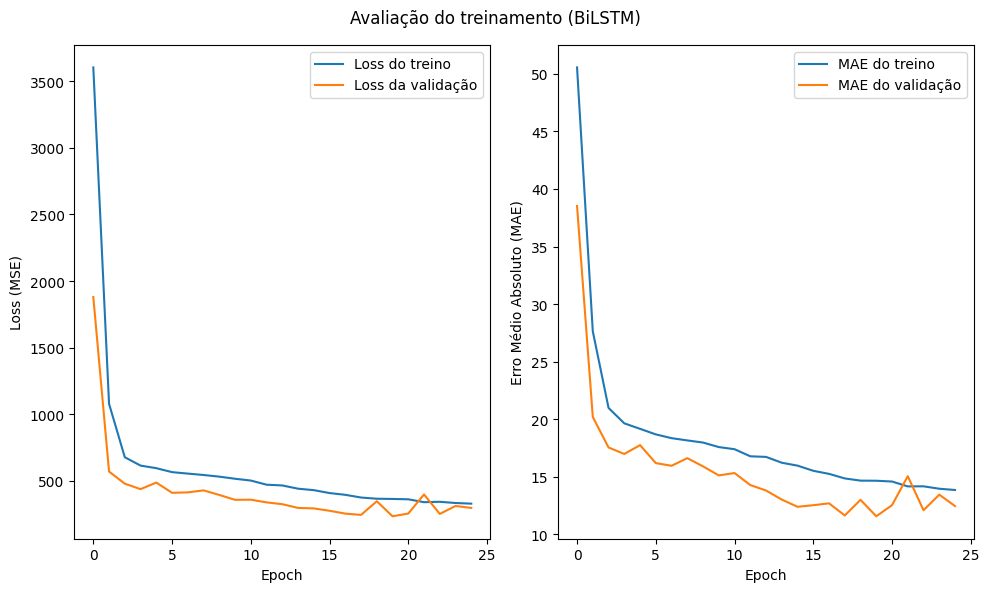

In [444]:
start=time.time()
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
model_checkpoint = ModelCheckpoint('bi_model.h5', monitor='val_loss')
history_bi=model_bi.fit(x1,y1,validation_data=(x2,y2),epochs=30,batch_size=200,
                                  callbacks=[early_stopping,model_checkpoint])

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.plot(history_bi.history['loss'], label='Loss do treino')
plt.plot(history_bi.history['val_loss'], label='Loss da validação')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(history_bi.history['mean_absolute_error'], label='MAE do treino')
plt.plot(history_bi.history['val_mean_absolute_error'], label='MAE do validação')
plt.ylabel('Erro Médio Absoluto (MAE)')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.suptitle('Avaliação do treinamento (BiLSTM)')
plt.tight_layout()
plt.show()

In [445]:
##Testando o modelo com os dados de teste

In [446]:
rul_prev = model_bi.predict(x_test).reshape(-1)
rul_prev = [float(x) for x in rul_prev]
end=time.time()

319/319 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


In [447]:
##Avaliando o modelo

293.0419402576079
17.12
0.15819685404321904
12.453609435172023
0.7040983739568585
Tempo de 77.209213s


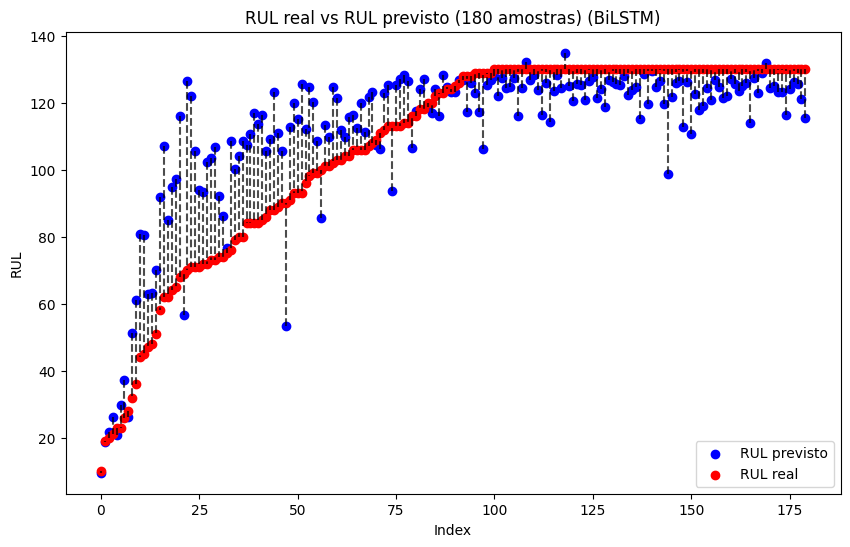

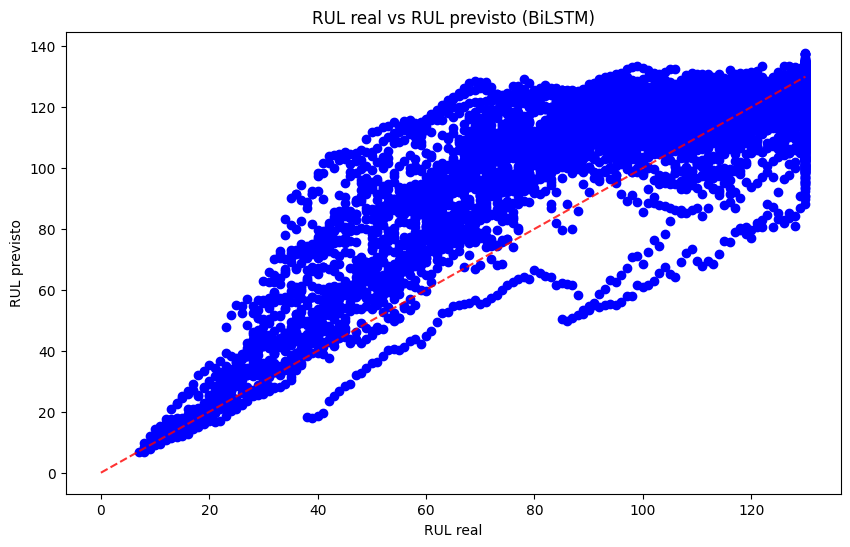

In [448]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
print(mean_squared_error(y_test,rul_prev))
print(f'{np.sqrt(mean_squared_error(y_test,rul_prev)):.2f}')
print(mean_absolute_percentage_error(y_test,rul_prev))
print(mean_absolute_error(y_test,rul_prev))
print(r2_score(y_test,rul_prev))  
print(f'Tempo de {end-start:2f}s') 

n_amostras = 180
indices = np.random.choice(len(rul_prev),size=n_amostras,replace=False)
y_real_amostra=np.array(y_test)[indices]
y_prev_amostra=np.array(rul_prev)[indices]
ordem = np.argsort(y_real_amostra)
y_real_amostra=y_real_amostra[ordem]
y_prev_amostra=y_prev_amostra[ordem]

plt.figure(figsize=(10,6))
plt.scatter(range(len(indices)),y_prev_amostra,c='blue',label='RUL previsto')
plt.scatter(range(len(indices)),y_real_amostra,c='red',label='RUL real')
plt.title(f'RUL real vs RUL previsto ({n_amostras} amostras) (BiLSTM)')
plt.ylabel('RUL')
plt.xlabel('Index')
plt.legend(loc='lower right')

for i in range(len(indices)):
    plt.plot([i,i],[y_prev_amostra[i],y_real_amostra[i]],ls='--',c='black',alpha=0.7)
 
plt.figure(figsize=(10,6))
plt.scatter(y_test,rul_prev,c='blue')
plt.plot([0,limit],[0,limit],ls='--',c='red',alpha=0.8)
plt.title('RUL real vs RUL previsto (BiLSTM)')
plt.ylabel('RUL previsto')
plt.xlabel('RUL real')

plt.show()